In [1]:
import numpy as np
import pandas as pd 
from statsmodels.formula.api import ols 
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
from category_encoders import OneHotEncoder
from sklearn.linear_model import Ridge
from itertools import product 
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import  plotly.graph_objects as go
from sklearn.model_selection import GridSearchCV, GroupKFold

%matplotlib inline

# Dataset
The dataset contains information about job salaries. Here are the columns in the dataset:

## Columns
- `work_year`: The number of years of work experience.
- `experience_level`: The level of experience in the job.
- `employment_type`: The type of employment (e.g., full-time, part-time, contract).
- `job_title`: The title of the job.
- `salary`: The salary amount.
- `salary_currency`: The currency in which the salary is provided.
- `salary_in_usd`: The salary amount converted to USD.
- `employee_residence`: The location of the employee's residence.
- `remote_ratio`: The ratio of remote work allowed (0 for on-site, 100 for fully remote).
- `company_location`: The location of the company.
- `company_size`: The size of the company.

These columns provide valuable information about the job salaries and the factors that may influence them, such as work experience, employment type, and remote work options. Analyzing this dataset can help gain insights into salary trends and patterns in different industries and locations.


In [2]:
df = pd.read_csv("/Users/ahmedmostafa/Downloads/exploratory_anaysis/.ipynb_checkpoints/salaries-checkpoint.csv")
df.head()

work_year experience_level employment_type                  job_title  \
0       2023               SE              FT                AI Engineer   
1       2024               EN              FT  Machine Learning Engineer   
2       2024               EN              FT  Machine Learning Engineer   
3       2024               SE              FT             Data Architect   
4       2024               SE              FT             Data Architect   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   46848             USD          46848                 OM             0   
1  130400             USD         130400                 US             0   
2   74500             USD          74500                 US             0   
3  212000             USD         212000                 AU             0   
4   93400             USD          93400                 AU             0   

  company_location company_size  
0               OM            M  
1               US            M  
2               US            M  
3               AU            M  
4               AU            M

here in this dataset we are most interested in salaries becouse it is the engine for all this jops

first to deeal with this datasets we have to deal with the values in the columns to be more readable 

In [3]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13348 entries, 0 to 13347
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           13348 non-null  int64 
 1   experience_level    13348 non-null  object
 2   employment_type     13348 non-null  object
 3   job_title           13348 non-null  object
 4   salary              13348 non-null  int64 
 5   salary_currency     13348 non-null  object
 6   salary_in_usd       13348 non-null  int64 
 7   employee_residence  13348 non-null  object
 8   remote_ratio        13348 non-null  int64 
 9   company_location    13348 non-null  object
 10  company_size        13348 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.1+ MB


In [10]:
fig = go.Figure()
for job_title in df['job_title'].unique():
    df_job = df[df['job_title'] == job_title]
    fig.add_trace(go.Scatter(x=df_job['work_year'], y=df_job['salary'], mode='lines', name=job_title))
fig.update_layout(title='Time Series Plot for Salary by Job Title',
                   xaxis_title='Year',
                   yaxis_title='Salary')
fig.show()

In [48]:
df["employment_type"].value_counts()

employment_type
FT    13289
CT       25
PT       22
FL       12
Name: count, dtype: int64

In [41]:
df['remote_ratio'] = df['remote_ratio'].map({0:'on_site', 100: 'hyprid', 50:'from_home'})

In [42]:
df["remote_ratio"].unique()

array(['on_site', 'hyprid', 'from_home'], dtype=object)

In [43]:
df["remote_ratio"].value_counts()

remote_ratio
on_site      8726
hyprid       4385
from_home     237
Name: count, dtype: int64

In [44]:
df.head()

work_year experience_level employment_type                  job_title  \
0       2023               SE              FT                AI Engineer   
1       2024               EN              FT  Machine Learning Engineer   
2       2024               EN              FT  Machine Learning Engineer   
3       2024               SE              FT             Data Architect   
4       2024               SE              FT             Data Architect   

   salary salary_currency  salary_in_usd employee_residence remote_ratio  \
0   46848             USD          46848                 OM      on_site   
1  130400             USD         130400                 US      on_site   
2   74500             USD          74500                 US      on_site   
3  212000             USD         212000                 AU      on_site   
4   93400             USD          93400                 AU      on_site   

  company_location company_size  
0               OM            M  
1               US            M  
2               US            M  
3               AU            M  
4               AU            M

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13348 entries, 0 to 13347
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           13348 non-null  int64 
 1   experience_level    13348 non-null  object
 2   employment_type     13348 non-null  object
 3   job_title           13348 non-null  object
 4   salary              13348 non-null  int64 
 5   salary_currency     13348 non-null  object
 6   salary_in_usd       13348 non-null  int64 
 7   employee_residence  13348 non-null  object
 8   remote_ratio        13348 non-null  int64 
 9   company_location    13348 non-null  object
 10  company_size        13348 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.1+ MB


In [23]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [24]:
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [11]:
import plotly.graph_objects as go

# Create histogram
fig = go.Figure(data=[go.Histogram(x=df['salary_in_usd'], nbinsx=50, marker_color='rgb(0, 191, 165)')])
# Update layout
fig.update_layout(title_text='Salary Distribution', xaxis_title='Salary in USD', yaxis_title='Count')
# Show figure
fig.show()

In [26]:
# import plotly.figure_factory as ff

# # Create distplot
# fig = ff.create_distplot([df['salary_in_usd']], ['salary_in_usd'], colors=["tan"])

# # Update layout
# fig.update_layout(title_text='Salary Distribution', xaxis_title='Salary in USD')

# # Show figure
# fig.show()

In [27]:
# df["salary_in_usd"].value_counts().plot(kind="box")

fig = go.Figure(data=[go.Box(y=df['salary_in_usd'], name='Salary in USD', marker_color='teal')])
fig.update_layout(title_text='Salary Distribution')
fig.show()

In [28]:
            #  'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
            #  'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
            #  'ylorrd'].
work_year_counts = df['work_year'].value_counts()
fig = go.Figure(data=[go.Bar(x=work_year_counts.index, y=work_year_counts.values, marker={'color': work_year_counts.values, 'colorscale': 'ylgn'})])
fig.update_layout(title_text='Work Year Counts', xaxis_title='Work Year', yaxis_title='Count')
fig.show()

from the code we found that the year of the 2023 was the most voted year for works , and second come 2024 but we still at first of the year do that it may be by the end of the year it be bigger than 2023 and then 2022 , and next come 2021 , 2020 there rate are very low compared to other years 

In [29]:
df["remote_ratio"].value_counts()

remote_ratio
0      8726
100    4385
50      237
Name: count, dtype: int64

* 0   --> On Site
* 50  --> hybrid
* 100 --> from home

In [30]:
df["remote_ratio"].value_counts()

remote_ratio
0      8726
100    4385
50      237
Name: count, dtype: int64

In [46]:
group_salary_remote_ratio_lvl = df.groupby("remote_ratio")["salary_in_usd"].mean().sort_values()
print(group_salary_remote_ratio_lvl)

remote_ratio
from_home     81803.890295
hyprid       144923.143672
on_site      154197.976736
Name: salary_in_usd, dtype: float64


* Major important to us
* we will discus the relationship between some columns and the salary columns

# salary and  remote_ratio

Text(0.5, 1.0, 'remote_ratio vs Salary')

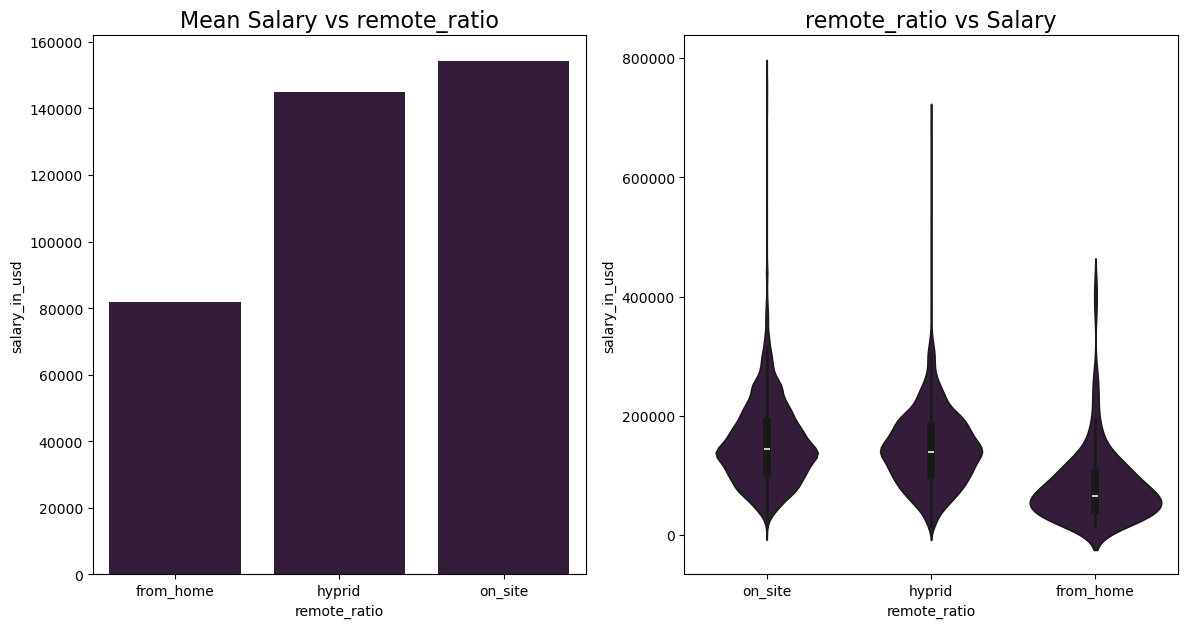

In [47]:

plt.figure(figsize=(14, 7))
sns.set_palette('rocket')

plt.subplot(1, 2, 1)
ax = sns.barplot(x=group_salary_remote_ratio_lvl.index, y=group_salary_remote_ratio_lvl)
ax.set_title('Mean Salary vs remote_ratio', fontdict={'fontsize': 16})

plt.subplot(1, 2, 2)
ax = sns.violinplot(data=df, x='remote_ratio', y='salary_in_usd')
ax.set_title('remote_ratio vs Salary', fontdict={'fontsize': 16})

# Company size and salary

In [33]:
groupby_company_size_salary = df.groupby("company_size")["salary_in_usd"].mean().sort_values()
print(groupby_company_size_salary)

company_size
S     87513.632768
L    139011.946809
M    151602.151010
Name: salary_in_usd, dtype: float64


In [35]:
# Create subplots: 2 rows, 1 column
fig = make_subplots(rows=2, cols=1)

# Add bar plot
fig.add_trace(
    go.Bar(x=groupby_company_size_salary.index, y=groupby_company_size_salary, marker_color="teal", name='Mean Salary vs company size'),
    row=1, col=1
)

# Add violin plot
fig.add_trace(
    go.Violin(y=df['salary_in_usd'], x=df['company_size'], box_visible=True, line_color='black',
              meanline_visible=True, fillcolor='lightseagreen', opacity=0.6, name='company size vs Salary',
              marker_color="teal"),  # Add color based on 'work_year'
    row=2, col=1
)

fig.update_layout(height=600, width=1000, title_text="Subplots")
fig.show()

In [1]:
df.pairplot()

NameError: name 'df' is not defined

# experience_level and salary

In [36]:
# df["experience_level"].value_counts().plot(kind='bar')
group_salary_experimence_lvl = df.groupby("experience_level")["salary_in_usd"].mean().sort_values()
print(group_salary_experimence_lvl)

experience_level
EN     89946.552017
MI    124228.060287
SE    163416.438991
EX    192327.614987
Name: salary_in_usd, dtype: float64


In [37]:
import plotly.graph_objects as go
# marker_color colors
# sandybrown, seagreen, seashell, sienna, silver,
            # skyblue, slateblue, slategray, slategrey, snow,
            # springgreen, steelblue, tan, teal, thistle, tomato,
            # turquoise, violet, wheat, white, whitesmoke,
            # yellow, yellowgreen
# Create subplots: 2 rows, 1 column
fig = make_subplots(rows=2, cols=1)

# Add bar plot
fig.add_trace(
    go.Bar(x=group_salary_experimence_lvl.index, y=group_salary_experimence_lvl, marker_color="teal", name='Mean Salary vs experience_level'),
    row=1, col=1
)

# Add violin plot
fig.add_trace(
    go.Violin(y=df['salary_in_usd'], x=df['experience_level'], box_visible=True, line_color='black',
              meanline_visible=True, fillcolor='lightseagreen', opacity=0.6, name='experience_level vs Salary',
              marker_color="tan"),  # Add color based on 'work_year'
    row=2, col=1
)

fig.update_layout(height=600, width=1000, title_text="Subplots")
fig.show()

In [38]:
# top 10 data science roles according to mean salary
top_ds_roles = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)[:10]
print(top_ds_roles)

job_title
Analytics Engineering Manager     399880.000000
Data Science Tech Lead            375000.000000
Head of Machine Learning          299758.428571
Managing Director Data Science    280000.000000
AWS Data Architect                258000.000000
Cloud Data Architect              250000.000000
AI Architect                      227026.636364
Director of Data Science          218775.333333
Head of Data                      209048.266667
Robotics Software Engineer        203750.000000
Name: salary_in_usd, dtype: float64


In [39]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: 1 row, 2 columns
fig = make_subplots(rows=2, cols=1)

# Add bar plot for top DS roles according to mean salary
fig.add_trace(
    go.Bar(y=top_ds_roles.index, x=top_ds_roles, orientation='h', name='Top DS roles according to mean salary',
           marker={'color': top_ds_roles, 'colorscale': 'Inferno'}),
    row=1, col=1
)

# Add bar plot for top 10 data science roles with highest number of openings
top_dr = df['job_title'].value_counts()[:10]
fig.add_trace(
    go.Bar(x=top_dr, y=top_dr.index, orientation='h', name='Top 10 data science roles with highest number of openings',
           marker={'color': top_dr, 'colorscale': 'Inferno'}),
    row=2, col=1
)

fig.update_layout(height=700, width=1200, title_text="Subplots")
fig.show()

In [40]:
# top 10 employee-residence according to mean salary
top_emp_residence = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)[:10]
print(top_emp_residence)

employee_residence
IL    417937.000000
QA    300000.000000
MY    200000.000000
PR    166000.000000
US    157930.848187
NZ    147681.666667
CA    144045.792899
SA    134999.000000
MX    134186.357143
AU    129777.100000
Name: salary_in_usd, dtype: float64


In [ ]:
A7med_M0stafa
tirfi7-xerqin-cySjir

In [41]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: 1 row, 2 columns
fig = make_subplots(rows=2, cols=1)

# Add bar plot for top DS roles according to mean salary
fig.add_trace(
    go.Bar(y=top_emp_residence.index, x=top_emp_residence, orientation='h', name='Top DS roles according to mean salary',
           marker={'color': top_ds_roles, 'colorscale': 'Inferno'}),
    row=1, col=1
)

# Add bar plot for top 10 data science roles with highest number of openings
top_dr = df['employee_residence'].value_counts()[:10]
fig.add_trace(
    go.Bar(x=top_dr, y=top_dr.index, orientation='h', name='Top 10 data science roles with highest number of openings',
           marker={'color': top_dr, 'colorscale': 'Inferno'}),
    row=2, col=1
)

fig.update_layout(height=700, width=1200, title_text="Subplots")
fig.show()

In [42]:
import plotly.express as px

# Prepare data
df_grouped = df.groupby(['company_size', 'remote_ratio']).size().reset_index(name='counts')

# Create facet bar plot
fig = px.bar(df_grouped, x='remote_ratio', y='counts', facet_col='company_size', color='remote_ratio', 
             category_orders={'company_size': sorted(df['company_size'].unique())})

# Update layout
fig.update_layout(barmode='stack', title='Company Size VS Remote Ratio Counts')

# Show figure
fig.show()

In [43]:
# %pip install -q pycountry-convert

def get_continent(col):
    try:
        if len(col) == 2:
            country_code = col
        else:
            country_code = pc.country_name_to_country_alpha2(col.strip('\'"'))
        continent_name = pc.convert_continent_code_to_continent_name(pc.country_alpha2_to_continent_code(country_code))
        return continent_name
    except:
        return None

df['company_location']=df['company_location'].apply(lambda x: get_continent(x))
df['employee_residence']=df['employee_residence'].apply(lambda x: get_continent(x))

In [44]:
columns_to_drop = ['salary', 'salary_currency','remote_ratio']
new_df=df.drop(columns=columns_to_drop)

In [45]:
def remove_outliers(df, column_name, threshold=1.5):
    Q1 = new_df[column_name].quantile(0.25)
    Q3 = new_df[column_name].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return filtered_df
new_df = remove_outliers(new_df, 'salary_in_usd')

In [46]:
max_salary = new_df['salary_in_usd'].max()
min_salary = new_df['salary_in_usd'].min()

num_subranges = 15

subranges = np.linspace(min_salary, max_salary, num=num_subranges+1, endpoint=True)
range_labels = []
for i in range(len(subranges)-1):
     subrange_min = int(subranges[i])
     subrange_max = int(subranges[i+1])
     range_label = f"{subrange_min:,} - {subrange_max:,}"
     range_labels.append(range_label)

range_labels

['15,000 - 34,626',
 '34,626 - 54,253',
 '54,253 - 73,880',
 '73,880 - 93,506',
 '93,506 - 113,133',
 '113,133 - 132,760',
 '132,760 - 152,386',
 '152,386 - 172,013',
 '172,013 - 191,640',
 '191,640 - 211,266',
 '211,266 - 230,893',
 '230,893 - 250,520',
 '250,520 - 270,146',
 '270,146 - 289,773',
 '289,773 - 309,400']

In [47]:
categorical_cols=['experience_level','employment_type','job_title','company_size','employee_residence','company_location']
encoded_df = pd.get_dummies(new_df[categorical_cols], prefix=categorical_cols, prefix_sep='_')
df_encoded = pd.concat([new_df.drop(categorical_cols, axis=1), encoded_df], axis=1)

df_encoded_ = pd.get_dummies(df_encoded['work_year'], prefix='year')
df_encoded_f = pd.concat([df_encoded, df_encoded_], axis=1)

In [48]:
from sklearn.model_selection import train_test_split

X = df_encoded_f.drop('salary_in_usd', axis=1)
y = df_encoded_f['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [49]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 1.045571108802801e+33
Mean Absolute Error (MAE): 3148732907395624.0
R-squared (R2) Score: -3.119013713607376e+23


In [50]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.1, 1.0, 10.0],
              
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}


rig = Ridge()
grid_search = GridSearchCV(rig, param_grid, scoring='r2', cv=10)

grid_search.fit(X_train, y_train)
best_ridge = grid_search.best_estimator_

y_pred = best_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 2546901167.234013
Mean Absolute Error (MAE): 39457.04377078318
R-squared (R2) Score: 0.2402410892070893


In [51]:
from sklearn.ensemble import GradientBoostingRegressor
GBreg = GradientBoostingRegressor(n_estimators = 100, random_state = 1, learning_rate=0.1, max_depth=3)
GBreg.fit(X_train, y_train)
y_pred = GBreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 2552609951.8531003
Mean Absolute Error (MAE): 40361.6192844425
R-squared (R2) Score: 0.2385381177530146


In [52]:
from sklearn.kernel_ridge import KernelRidge
KernelRidge_model = KernelRidge(alpha=0.0001)
KernelRidge_model.fit(X_train, y_train)
y_pred = KernelRidge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 2795953853.051815
Mean Absolute Error (MAE): 41273.08482652148
R-squared (R2) Score: 0.1659468842566557


In [53]:
from sklearn.ensemble import RandomForestRegressor
rand_forest_model = RandomForestRegressor()
rand_forest_model.fit(X_train, y_train)
y_pred = rand_forest_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 2699213338.141797
Mean Absolute Error (MAE): 40683.21229337449
R-squared (R2) Score: 0.19480527467366693


In [67]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10, scoring='r2')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

best_xgb_model.fit(X_train, y_train)
y_pred = best_xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
acc = grid_search.predict(X_train)
acc_test = grid_search.predict(X_test)


print("Accuracy for Training:", acc)
print("Accuracy for testing:",acc_test )
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Accuracy for Training: [157558.31 124259.02 124259.02 ... 122011.1  124603.8  124603.8 ]
Accuracy for testing: [166397.42  166397.42  122011.1   ...  76105.39   12384.858 143507.06 ]
Mean Squared Error (MSE): 2485030790.9775486
Mean Absolute Error (MAE): 39359.45892212846
R-squared (R2) Score: 0.2586974668159656


In [55]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=10, scoring='r2')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_lgb_model = grid_search.best_estimator_
y_pred = best_lgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 9430, number of used features: 45
[LightGBM] [Info] Start training from score 149114.413998
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [56]:
from catboost import CatBoostRegressor

param_grid = {'iterations': [100, 200, 300],
              'depth': [4, 6, 8],
              'learning_rate': [0.1, 0.01, 0.001]}

catboost = CatBoostRegressor()

grid_search = GridSearchCV(catboost, param_grid, scoring='r2', cv=10)

grid_search.fit(X_train, y_train)

best_catboost = grid_search.best_estimator_

y_pred = best_catboost.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

0:	learn: 58047.8269025	total: 58.2ms	remaining: 5.76s
1:	learn: 57018.3248318	total: 59.1ms	remaining: 2.9s
2:	learn: 56218.2531823	total: 59.8ms	remaining: 1.93s
3:	learn: 55544.0534473	total: 60.5ms	remaining: 1.45s
4:	learn: 54993.5909953	total: 61.3ms	remaining: 1.16s
5:	learn: 54572.7294805	total: 62.1ms	remaining: 972ms
6:	learn: 54094.7205569	total: 62.8ms	remaining: 834ms
7:	learn: 53771.8648000	total: 63.5ms	remaining: 730ms
8:	learn: 53415.8382474	total: 64.2ms	remaining: 649ms
9:	learn: 53193.8685857	total: 64.8ms	remaining: 584ms
10:	learn: 52897.1350709	total: 65.6ms	remaining: 530ms
11:	learn: 52654.9611634	total: 66.2ms	remaining: 485ms
12:	learn: 52482.6234044	total: 66.8ms	remaining: 447ms
13:	learn: 52349.6591645	total: 67.5ms	remaining: 414ms
14:	learn: 52184.8804923	total: 68.1ms	remaining: 386ms
15:	learn: 52058.7201770	total: 68.7ms	remaining: 361ms
16:	learn: 51930.4708213	total: 69.4ms	remaining: 339ms
17:	learn: 51839.1544392	total: 70ms	remaining: 319ms
18:	l

In [57]:
model=best_ridge
model

Ridge(alpha=10.0, solver='lsqr')

In [58]:
feature_names = X_train.columns
feature_names

Index(['work_year', 'experience_level_EN', 'experience_level_EX',
       'experience_level_MI', 'experience_level_SE', 'employment_type_CT',
       'employment_type_FL', 'employment_type_FT', 'employment_type_PT',
       'job_title_AI Architect',
       ...
       'job_title_Staff Data Scientist',
       'job_title_Staff Machine Learning Engineer', 'company_size_L',
       'company_size_M', 'company_size_S', 'year_2020', 'year_2021',
       'year_2022', 'year_2023', 'year_2024'],
      dtype='object', length=156)

In [66]:
# 'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
            #  'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
            #  'ylorrd']
# Assuming 'model' is your trained model
feature_importances = np.abs(model.coef_)  

original_feature_names = 'experience_level','employment_type','job_title','company_size','year','company_location','employee_residence'

if feature_importances.shape[0] != len(original_feature_names):
    feature_importances = feature_importances[:len(original_feature_names)]

importance_df = pd.DataFrame({'Feature': original_feature_names, 'Importance': feature_importances})
importance_df = importance_df.groupby('Feature', as_index=False).sum()
importance_df = importance_df.sort_values('Importance', ascending=False)

# Create bar plot
fig = go.Figure(data=[go.Bar(x=importance_df['Importance'], y=importance_df['Feature'], orientation='h', 
                             marker={'color': importance_df['Importance'], 'colorscale': 'ylgnbu'})])

# Update layout
fig.update_layout(title_text='Feature Importances - Ridge Regression', xaxis_title='Importance', yaxis_title='Feature')

# Show figure
fig.show()

In [26]:
# import numpy as np

# def custom_split(dataset, ratios, random_state=None):
#     """
#     Split a dataset into subsets according to specified ratios.

#     Parameters:
#     - dataset: The dataset to be split. This can be a list, numpy array, pandas DataFrame, etc.
#     - ratios: A list of ratios for each subset. Ratios should sum up to 1.
#     - random_state: Seed for random number generation.

#     Returns:
#     - List of subsets, each containing the corresponding portion of the dataset.
#     """
#     # Check if ratios sum up to 1
#     if not np.isclose(sum(ratios), 1.0):
#         raise ValueError("Ratios must sum up to 1.")

#     # Shuffle dataset if random_state is provided
#     if random_state is not None:
#         np.random.seed(random_state)
#         np.random.shuffle(dataset)

#     # Calculate the number of elements for each subset
#     subset_sizes = [int(len(dataset) * ratio) for ratio in ratios]

#     # Split dataset into subsets
#     subsets = []
#     start_index = 0
#     for size in subset_sizes:
#         subsets.append(dataset[start_index:start_index + size])
#         start_index += size

#     return subsets

# # Example usage:
# if __name__ == "__main__":
#     # Example dataset
#     dataset = np.arange(100)

#     # Define ratios for splitting
#     ratios = [0.6, 0.2, 0.2]

#     # Split the dataset
#     subsets = custom_split(dataset, ratios, random_state=42)

#     # Print the sizes of each subset
#     for i, subset in enumerate(subsets):
#         print(f"Subset {i+1} size: {len(subset)}")


Subset 1 size: 60
Subset 2 size: 20
Subset 3 size: 20
